In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../../data/AirPassengers.csv')

In [3]:
df.head()

,Date,#Passengers
0,12-Jan-1949,112
1,24-Feb-1949,118
2,22-Mar-1949,132
3,5-Apr-1949,129
4,24-May-1949,121


In [4]:
df.tail()

,Date,#Passengers
139,16-Aug-1960,606
140,14-Sep-1960,508
141,20-Oct-1960,461
142,26-Nov-1960,390
143,4-Dec-1960,432


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [9]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_Name'] = df['Date'].dt.day_name()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
 2   Year         144 non-null    int32         
 3   Month        144 non-null    int32         
 4   Day          144 non-null    int32         
 5   Day_Name     144 non-null    object        
dtypes: datetime64[ns](1), int32(3), int64(1), object(1)
memory usage: 5.2+ KB


In [11]:
df.groupby('Month')['#Passengers'].sum()

Month
1     2901
2     2820
3     3242
4     3205
5     3262
6     3740
7     4216
8     4213
9     3629
10    3199
11    2794
12    3142
Name: #Passengers, dtype: int64

In [12]:
df.groupby(['Year'])[('#Passengers')].agg('sum')

Year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
Name: #Passengers, dtype: int64

In [13]:
df.groupby('Day_Name')['#Passengers'].sum()

Day_Name
Friday       6171
Monday       5442
Saturday     6920
Sunday       6174
Thursday     6048
Tuesday      4220
Wednesday    5388
Name: #Passengers, dtype: int64

In [14]:
df.groupby('Month')['#Passengers'].median()

Month
1     223.0
2     214.5
3     251.5
4     252.0
5     252.0
6     289.5
7     333.0
8     320.0
9     285.5
10    251.5
11    220.0
12    253.5
Name: #Passengers, dtype: float64

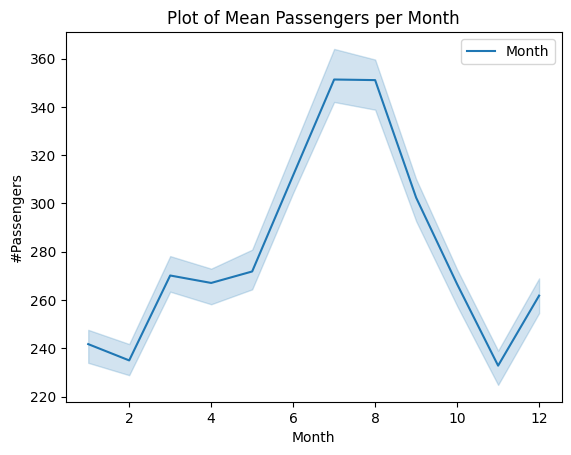

In [15]:
ax = sns.lineplot(data=df, x = 'Month', y='#Passengers', errorbar = ('ci', 20))
ax.set_title('Plot of Mean Passengers per Month')
ax.legend(labels=['Month'])
plt.show()

In [16]:
import warnings
warnings.filterwarnings('ignore')

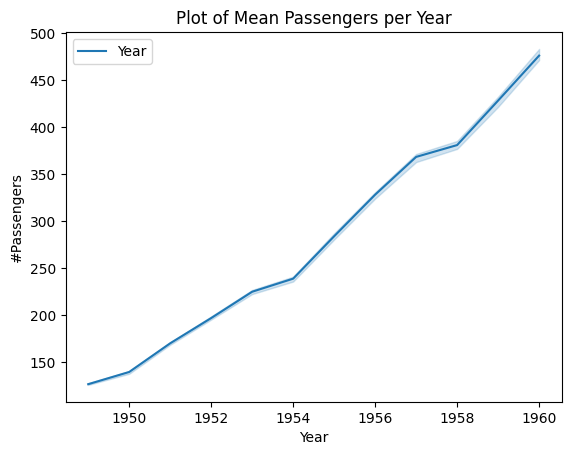

In [17]:
ax = sns.lineplot(data = df, x = 'Year', y = '#Passengers', errorbar = ('ci', 20))
ax.set_title('Plot of Mean Passengers per Year')
ax.legend(labels=['Year'])
plt.show()

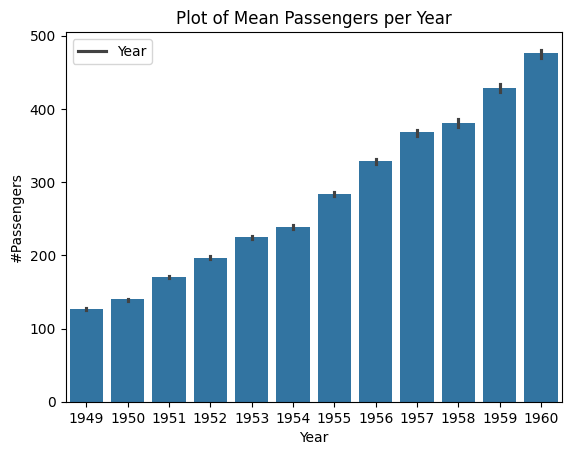

In [18]:
ax = sns.barplot(data = df, x = 'Year', y = '#Passengers', errorbar = ('ci', 20))
ax.set_title('Plot of Mean Passengers per Year')
ax.legend(labels=['Year'])
plt.show()

In [19]:
# mean_val = df['#Passengers'].mean()
# std_val = df['#Passengers'].std()

# def z_score(value):
#     return (value - mean_val) / std_val

# df['z-score'] = df['#Passengers'].apply(z_score)

df['z-score'] = (df['#Passengers'] - df['#Passengers'].mean()) / df['#Passengers'].std()


In [20]:
df

,Date,#Passengers,Year,Month,Day,Day_Name,z-score
0,1949-01-12,112,1949,1,12,Wednesday,-1.402882
1,1949-02-24,118,1949,2,24,Thursday,-1.352868
2,1949-03-22,132,1949,3,22,Tuesday,-1.236169
3,1949-04-05,129,1949,4,5,Tuesday,-1.261176
4,1949-05-24,121,1949,5,24,Tuesday,-1.327861
...,...,...,...,...,...,...,...
139,1960-08-16,606,1960,8,16,Tuesday,2.714940
140,1960-09-14,508,1960,9,14,Wednesday,1.898044
141,1960-10-20,461,1960,10,20,Thursday,1.506268
142,1960-11-26,390,1960,11,26,Saturday,0.914435


In [21]:
df_high = df.sort_values(by='z-score', ascending=False)[:10]
df_low = df.sort_values(by='z-score', ascending=True)[:10]

In [22]:
df_high

,Date,#Passengers,Year,Month,Day,Day_Name,z-score
138,1960-07-02,622,1960,7,2,Saturday,2.848311
139,1960-08-16,606,1960,8,16,Tuesday,2.714940
127,1959-08-01,559,1959,8,1,Saturday,2.323164
126,1959-07-29,548,1959,7,29,Wednesday,2.231471
137,1960-06-02,535,1960,6,2,Thursday,2.123108
140,1960-09-14,508,1960,9,14,Wednesday,1.898044
115,1958-08-18,505,1958,8,18,Monday,1.873037
114,1958-07-13,491,1958,7,13,Sunday,1.756338
136,1960-05-27,472,1960,5,27,Friday,1.597960
125,1959-06-24,472,1959,6,24,Wednesday,1.597960


In [23]:
df_low

,Date,#Passengers,Year,Month,Day,Day_Name,z-score
10,1949-11-16,104,1949,11,16,Wednesday,-1.469568
0,1949-01-12,112,1949,1,12,Wednesday,-1.402882
22,1950-11-19,114,1950,11,19,Sunday,-1.386211
12,1950-01-15,115,1950,1,15,Sunday,-1.377875
11,1949-12-14,118,1949,12,14,Wednesday,-1.352868
1,1949-02-24,118,1949,2,24,Thursday,-1.352868
9,1949-10-15,119,1949,10,15,Saturday,-1.344532
4,1949-05-24,121,1949,5,24,Tuesday,-1.327861
16,1950-05-17,125,1950,5,17,Wednesday,-1.294518
13,1950-02-16,126,1950,2,16,Thursday,-1.286183


[]

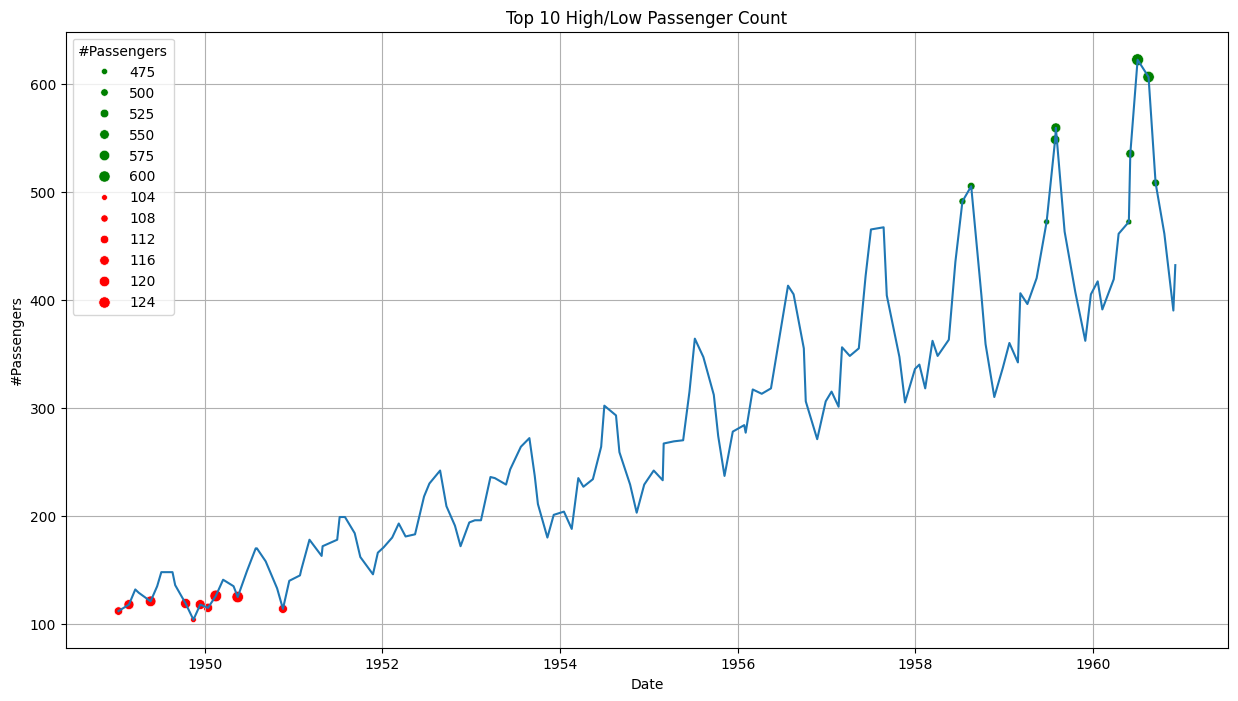

In [24]:
plt.figure(figsize=(15,8))
plt.grid = True
plt.title('Top 10 High/Low Passenger Count')
ax = sns.lineplot(data = df, x='Date', y = '#Passengers')
ax = sns.scatterplot(data = df_high, x = 'Date', y = '#Passengers', size = '#Passengers', color = 'g')
ax = sns.scatterplot(data = df_low, x = 'Date', y = '#Passengers', size = '#Passengers', color = 'r')
ax.grid()
ax.plot()

In [ ]:
cpark = pd.read_csv('../../data/carpark.csv')

In [31]:
cpark.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [32]:
cpark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SystemCodeNumber  35717 non-null  object
 1   Capacity          35717 non-null  int64 
 2   Occupancy         35717 non-null  int64 
 3   LastUpdated       35717 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [33]:
cpark['LastUpdated'] = pd.to_datetime(cpark['LastUpdated'])

In [34]:
cpark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SystemCodeNumber  35717 non-null  object        
 1   Capacity          35717 non-null  int64         
 2   Occupancy         35717 non-null  int64         
 3   LastUpdated       35717 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB
